# 1. Add Project Root

In [1]:
# notebooks/eda_creditcard_fraud.ipynb - Cell 1: Add project root to path

import os
import sys

# Get the current working directory of the notebook (e.g., 'fraud_detection_project/notebooks/')
current_dir = os.getcwd()
# Get the parent directory (which is 'fraud_detection_project/')
project_root = os.path.dirname(current_dir)

# Add the project root to sys.path so Python can find 'src'
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added '{project_root}' to sys.path.")
else:
    print(f"'{project_root}' already in sys.path.")

Added 'c:\Users\skibret\Downloads\KAIM\Week 8\Project\fraud_detection_project' to sys.path.


# 2. Import Statements

In [2]:
# notebooks/eda_creditcard_fraud.ipynb - Cell 2: Import Statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_preprocessing import load_creditcard_data, remove_duplicates, correct_data_types

# Configure plot styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# 3. Load Raw Data

In [3]:
# notebooks/eda_creditcard_fraud.ipynb - Cell 3: Load Raw Data

print("--- Loading Credit Card Fraud Data ---")
creditcard_df = load_creditcard_data()

# if creditcard_df is not None:
#     print("\nCreditcard.csv loaded successfully.")
#     print("Shape:", creditcard_df.shape)
#     print("Columns:", creditcard_df.columns.tolist())
#     print("\nFirst 5 rows:")
#     print(creditcard_df.head())
# else:
#     print("Failed to load creditcard.csv. Please check the path and file existence.")

--- Loading Credit Card Fraud Data ---


2025-07-20 15:28:00,779 - INFO - Successfully loaded creditcard.csv from C:/Users/skibret/Downloads/KAIM/Week 8/Project/fraud_detection_project/data/raw/creditcard.csv. Shape: (284807, 31)


# 4.  Initial Data Cleaning & Type Correction

In [4]:
# notebooks/eda_creditcard_fraud.ipynb - Cell 4: Initial Data Cleaning

if creditcard_df is not None:
    print("\n--- Initial Cleaning for Credit Card Data ---")

    # Check for missing values (V1-V28 are usually clean from PCA, 'Time' and 'Amount' too)
    missing_values_count = creditcard_df.isnull().sum().sum()
    print(f"Total missing values before handling: {missing_values_count}")
    if missing_values_count > 0:
        # Decide on strategy: drop or impute if any are found
        creditcard_df_cleaned = creditcard_df.dropna().copy()
        print(f"Dropped {missing_values_count} rows with missing values (if any).")
    else:
        creditcard_df_cleaned = creditcard_df.copy()
        print("No missing values found.")

    # Remove duplicates
    creditcard_df_cleaned = remove_duplicates(creditcard_df_cleaned)

    # 'Time' is in seconds, 'Amount' is numeric. No specific type correction needed unless
    # you want to convert 'Time' to datetime for specific time-series analysis.
    # For now, we'll keep 'Time' as seconds as per the dataset description.

    print("\nCredit Card Data after initial cleaning:")
    creditcard_df_cleaned.info()
    print("\nMissing values remaining:\n", creditcard_df_cleaned.isnull().sum())
else:
    print("Credit Card Data not loaded. Skipping initial cleaning.")


--- Initial Cleaning for Credit Card Data ---
Total missing values before handling: 0
No missing values found.


2025-07-20 15:28:02,046 - INFO - Removed 1081 duplicate rows.



Credit Card Data after initial cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283

# 5. EDA - Class Distribution

2025-07-20 15:28:02,752 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\skibret\AppData\Local\Temp\ipykernel_29384\1273921206.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=creditcard_df_cleaned, palette='viridis')
2025-07-20 15:28:02,978 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


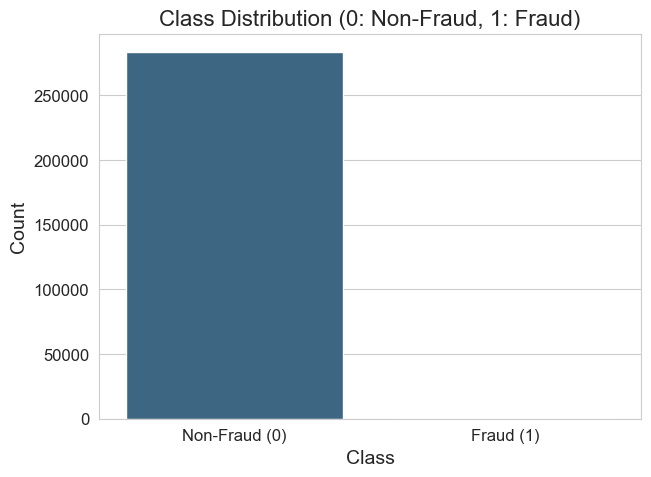


Class distribution (normalized):
 Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


In [5]:
# notebooks/eda_creditcard_fraud.ipynb - Cell 4: EDA - Class Distribution

if creditcard_df_cleaned is not None:
    plt.figure(figsize=(7, 5))
    sns.countplot(x='Class', data=creditcard_df_cleaned, palette='viridis')
    plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)', fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
    plt.show()
    print("\nClass distribution (normalized):\n", creditcard_df_cleaned['Class'].value_counts(normalize=True))
else:
    print("DataFrame not available for plotting.")

# 6.  EDA - Amount Distribution & vs. Class

2025-07-20 15:28:04,277 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\skibret\AppData\Local\Temp\ipykernel_29384\3349908208.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=creditcard_df_cleaned, ax=axes[1], palette='pastel')
2025-07-20 15:28:04,493 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


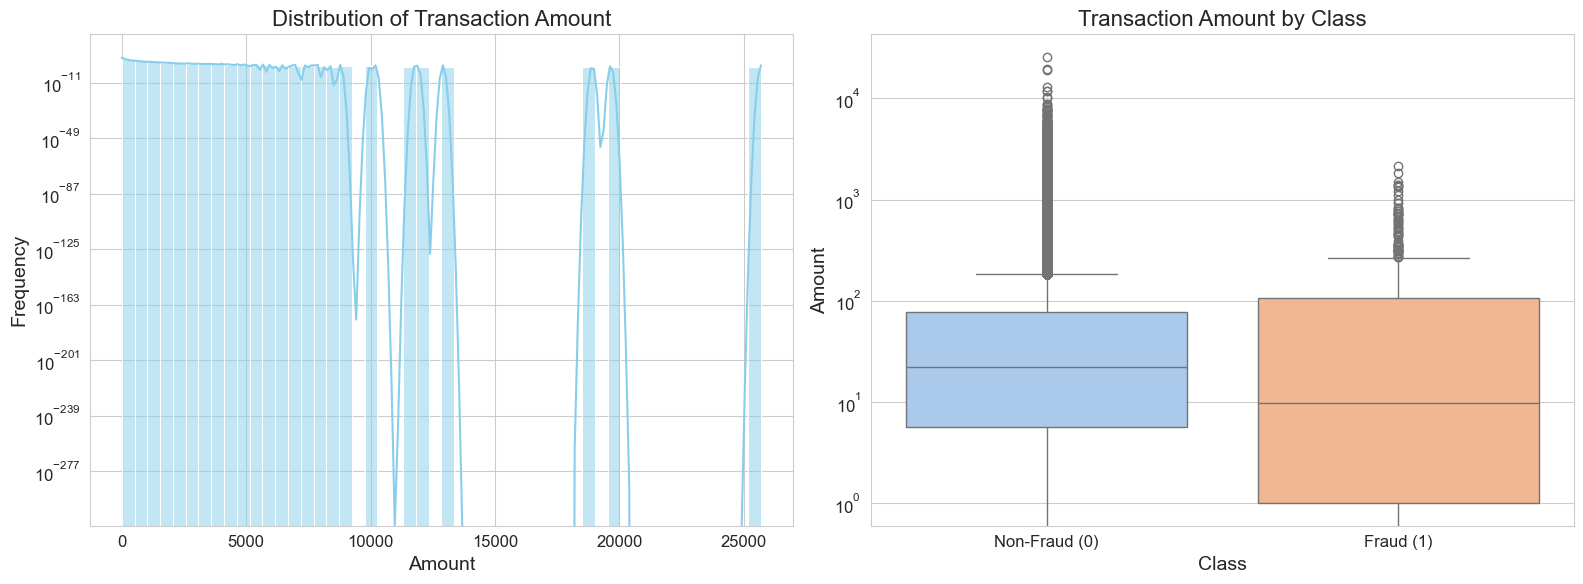

In [6]:
# notebooks/eda_creditcard_fraud.ipynb - Cell 6: EDA - Amount

if creditcard_df_cleaned is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Distribution of Amount (log scale due to skewness)
    sns.histplot(creditcard_df_cleaned['Amount'], bins=50, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title('Distribution of Transaction Amount', fontsize=16)
    axes[0].set_xlabel('Amount', fontsize=14)
    axes[0].set_ylabel('Frequency', fontsize=14)
    axes[0].set_yscale('log') # Log scale due to skewed distribution

    # Amount vs. Class (log scale for better visualization)
    sns.boxplot(x='Class', y='Amount', data=creditcard_df_cleaned, ax=axes[1], palette='pastel')
    axes[1].set_title('Transaction Amount by Class', fontsize=16)
    axes[1].set_xlabel('Class', fontsize=14)
    axes[1].set_ylabel('Amount', fontsize=14)
    axes[1].set_yscale('log') # Log scale for better visualization
    axes[1].set_xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])

    plt.tight_layout()
    plt.show()
else:
    print("DataFrame not available for plotting.")

# 7. EDA - Time Distribution & vs. Class

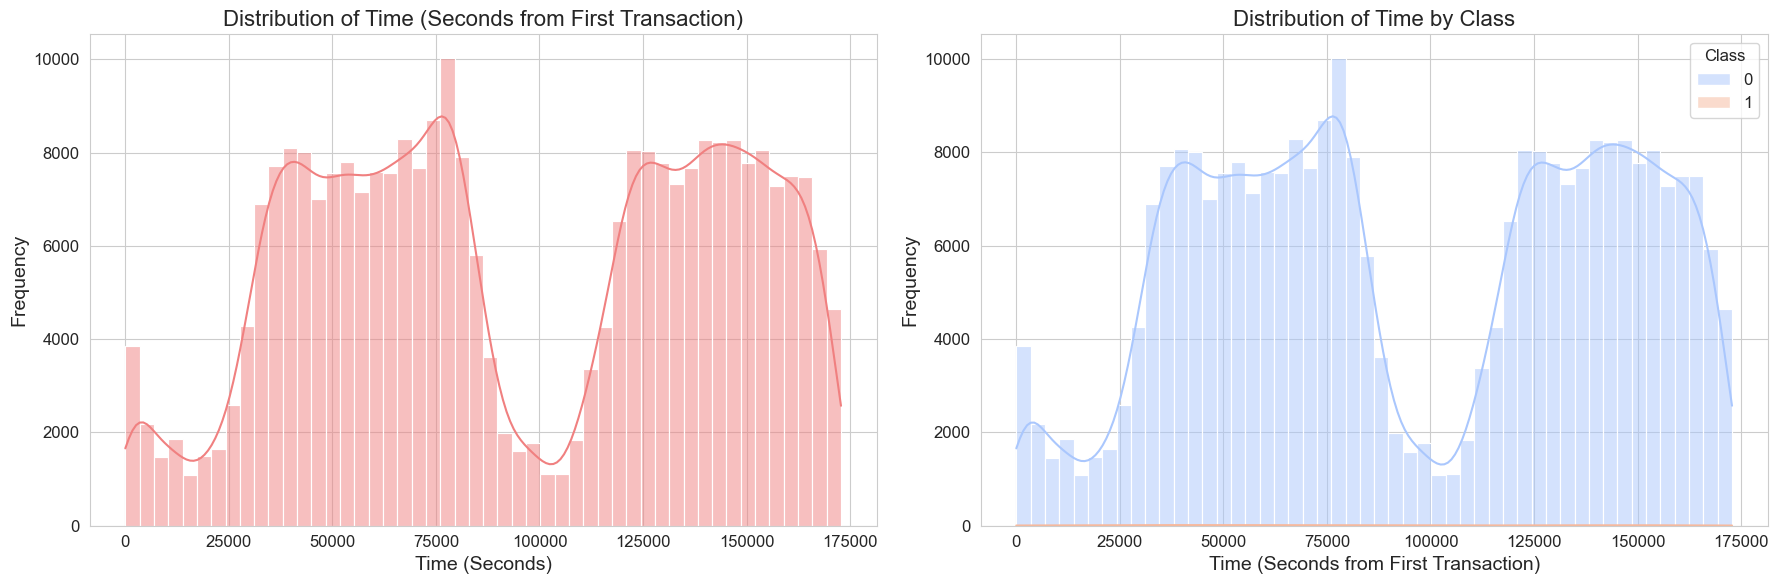

In [7]:
# notebooks/eda_creditcard_fraud.ipynb - Cell 7: EDA - Time

if creditcard_df_cleaned is not None:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Distribution of Time
    sns.histplot(creditcard_df_cleaned['Time'], bins=50, kde=True, ax=axes[0], color='lightcoral')
    axes[0].set_title('Distribution of Time (Seconds from First Transaction)', fontsize=16)
    axes[0].set_xlabel('Time (Seconds)', fontsize=14)
    axes[0].set_ylabel('Frequency', fontsize=14)

    # Time vs. Class (Fraudulent transactions often cluster in time)
    sns.histplot(data=creditcard_df_cleaned, x='Time', hue='Class', bins=50, kde=True, common_norm=False, ax=axes[1], palette='coolwarm')
    axes[1].set_title('Distribution of Time by Class', fontsize=16)
    axes[1].set_xlabel('Time (Seconds from First Transaction)', fontsize=14)
    axes[1].set_ylabel('Frequency', fontsize=14)

    plt.tight_layout()
    plt.show()
else:
    print("DataFrame not available for plotting.")

# 8. EDA - Correlation Matrix with 'Class'

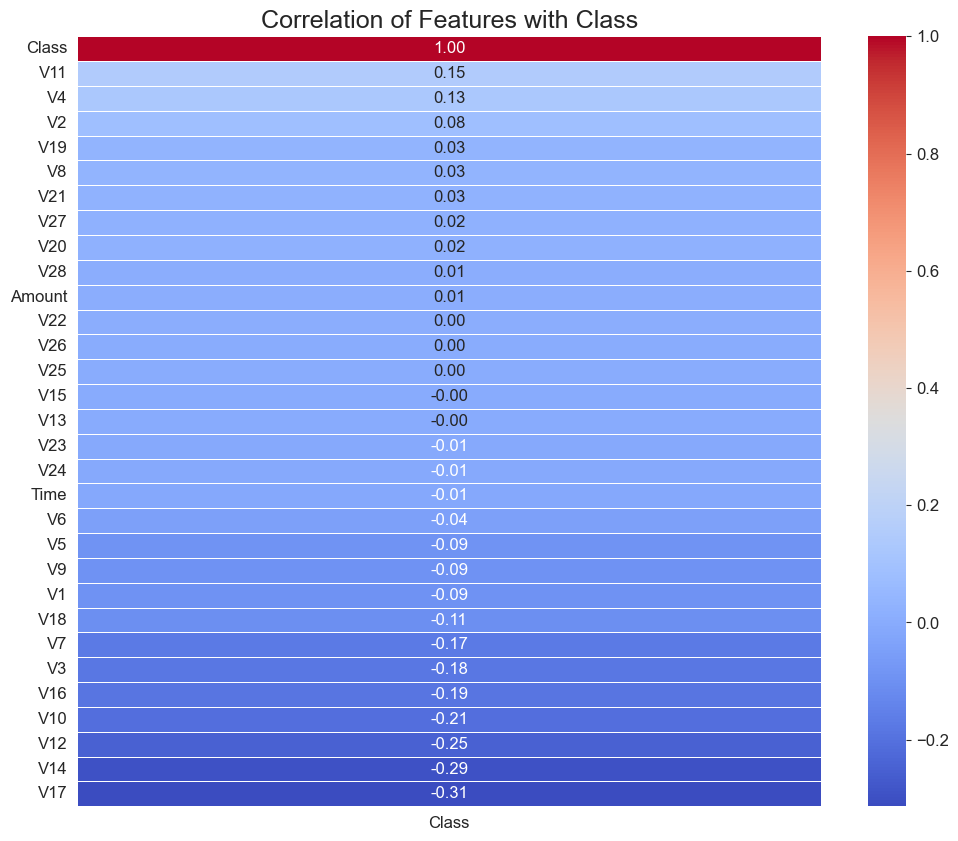

In [8]:
# notebooks/eda_creditcard_fraud.ipynb - Cell 8: EDA - Correlation Matrix

if creditcard_df_cleaned is not None:
    plt.figure(figsize=(12, 10))
    # Select only V features, Amount, Time, and Class for correlation
    correlation_cols = [col for col in creditcard_df_cleaned.columns if col.startswith('V') or col in ['Time', 'Amount', 'Class']]
    correlation_matrix = creditcard_df_cleaned[correlation_cols].corr()
    sns.heatmap(correlation_matrix[['Class']].sort_values(by='Class', ascending=False),
                annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation of Features with Class', fontsize=18)
    plt.show()
else:
    print("DataFrame not available for plotting.")

# 9. EDA - Distribution of V Features by Class (Selected)

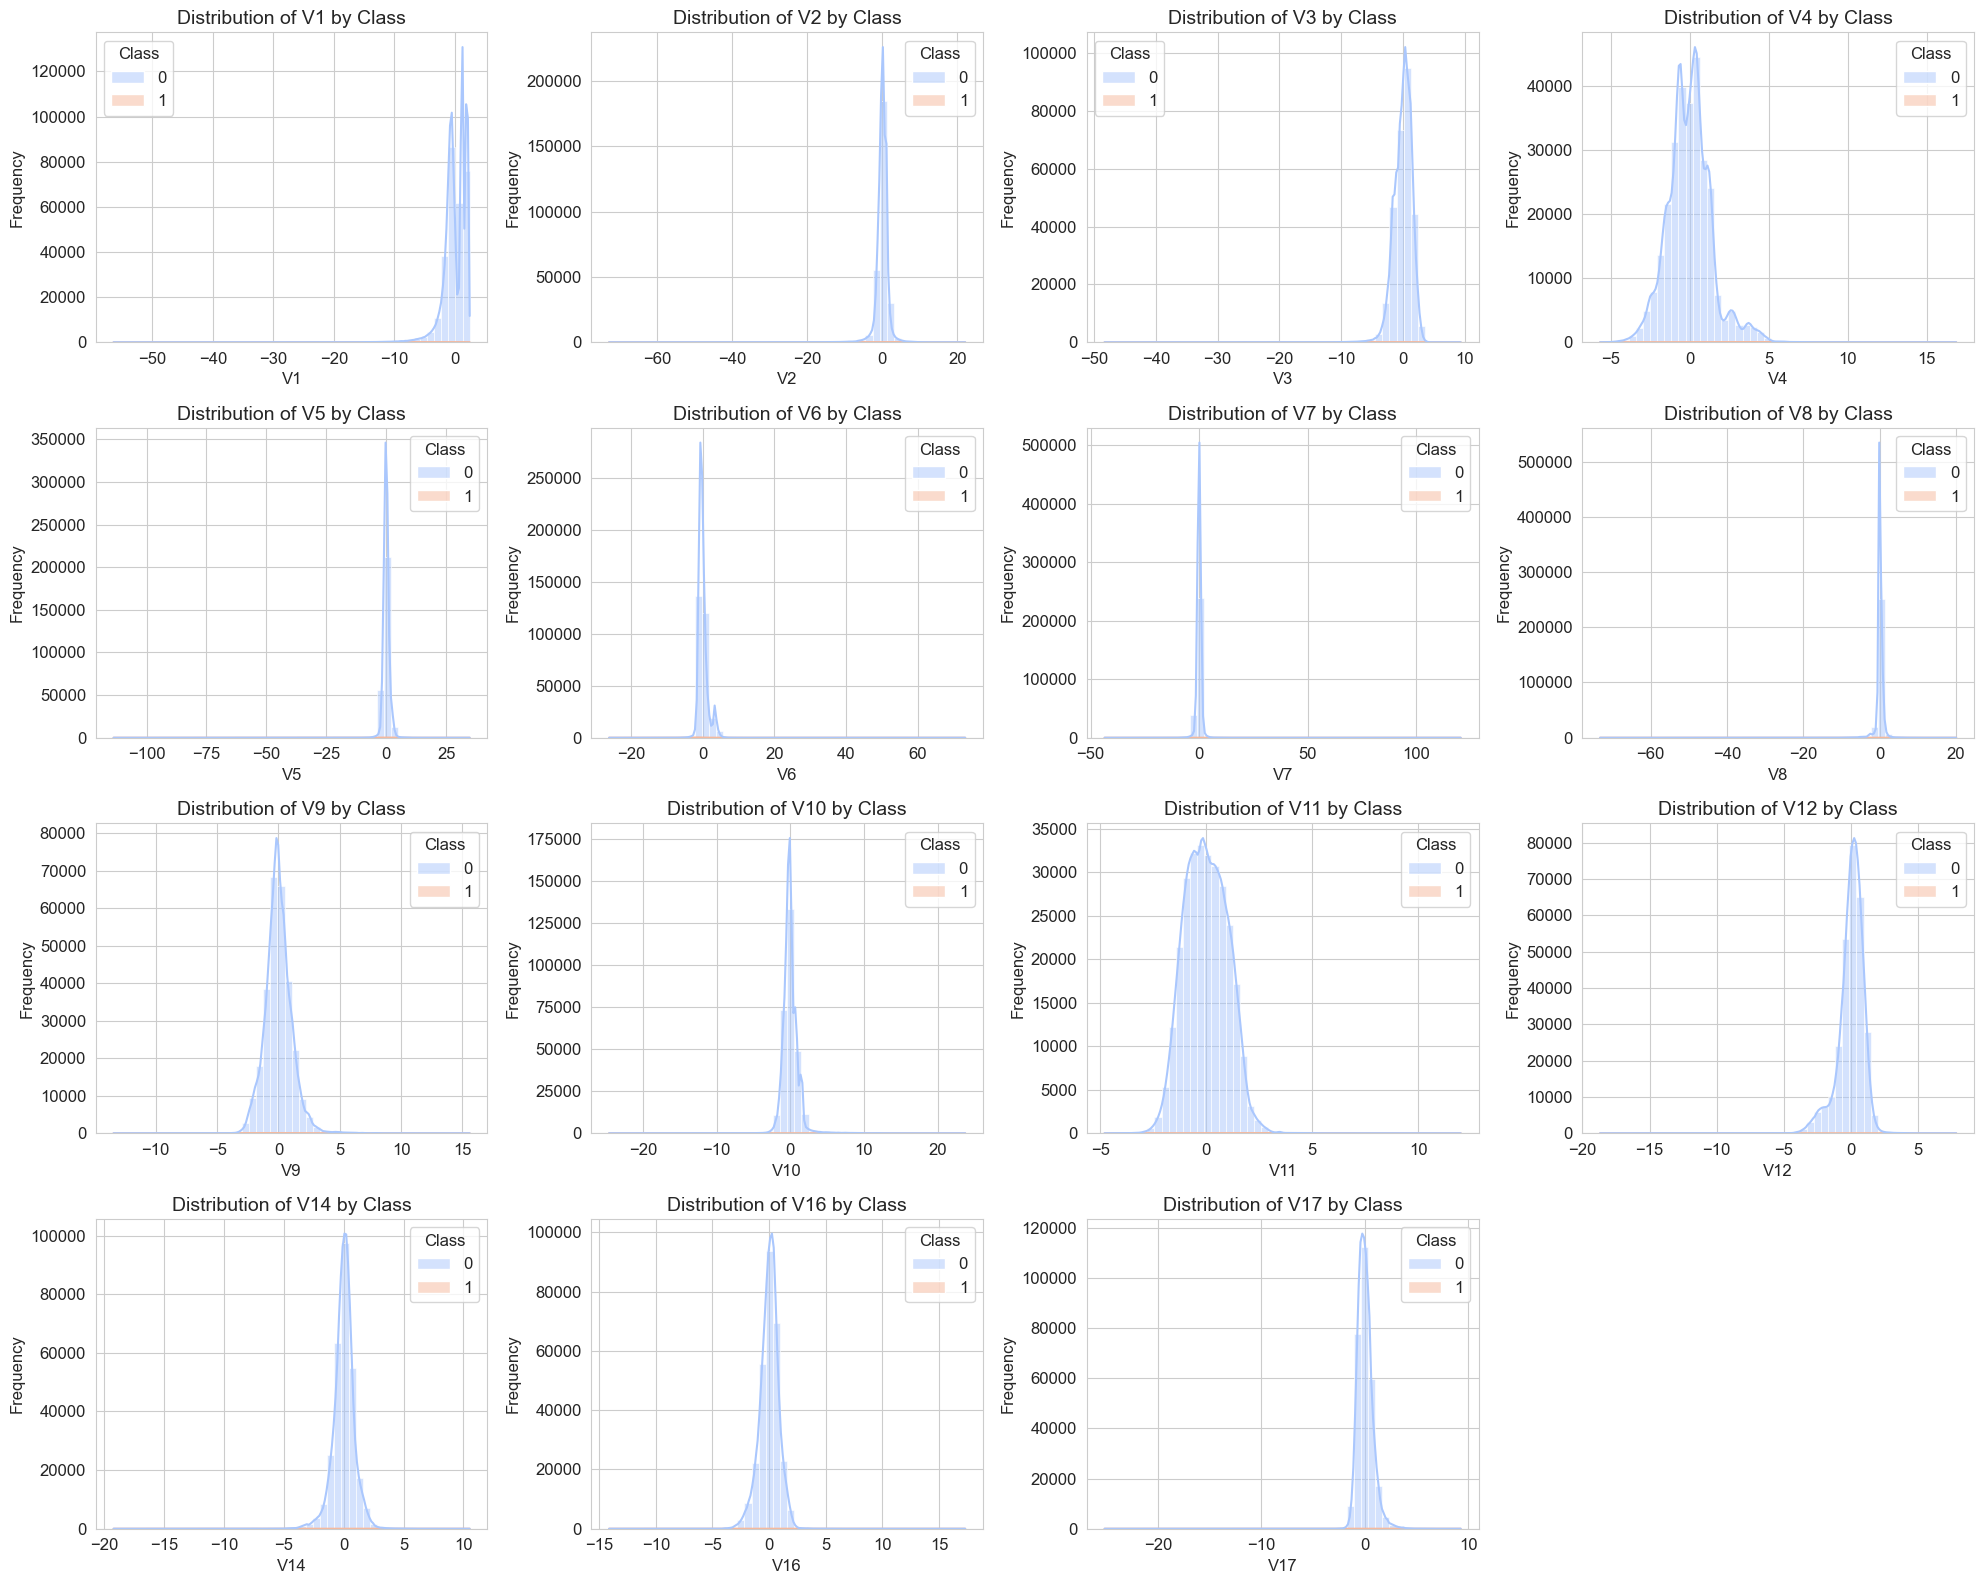

In [9]:
# notebooks/eda_creditcard_fraud.ipynb - Cell 9: EDA - V Features Distribution

if creditcard_df_cleaned is not None:
    # Select a few V features that might show difference or are highly correlated
    v_features_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']

    if len(v_features_to_plot) > 0:
        # Calculate number of rows needed for subplots
        n_rows = int(np.ceil(len(v_features_to_plot) / 4))
        fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(20, 4 * n_rows))
        axes = axes.flatten()

        for i, feature in enumerate(v_features_to_plot):
            if feature in creditcard_df_cleaned.columns:
                sns.histplot(data=creditcard_df_cleaned, x=feature, hue='Class', bins=50, kde=True, common_norm=False, palette='coolwarm', ax=axes[i])
                axes[i].set_title(f'Distribution of {feature} by Class', fontsize=14)
                axes[i].set_xlabel(feature, fontsize=12)
                axes[i].set_ylabel('Frequency', fontsize=12)
            else:
                print(f"Warning: Feature '{feature}' not found in DataFrame.")

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
    else:
        print("No V features selected for plotting.")
else:
    print("DataFrame not available for plotting.")

# 10.  Save Processed Data

In [ ]:
# notebooks/eda_creditcard_fraud.ipynb - Cell 10: Save Processed Data (Optional)

if creditcard_df_cleaned is not None:
    # You might want to save this processed DataFrame for direct use in model building.
    # Create 'data/processed' directory if it doesn't exist
    try:
        output_filepath = ('./data/processed/processed_creditcard_fraud.csv')
        creditcard_df_cleaned.to_csv(output_filepath, index=False)
        print(f"\nProcessed credit card fraud data saved to {output_filepath}")
    except Exception as e:
        print(f"Error saving processed data: {e}")
else:
    print("No processed DataFrame to save.")


Processed credit card fraud data saved to ./data/processed\processed_creditcard_fraud.csv
